In [182]:
from time import sleep
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

In [157]:
driver = webdriver.Chrome(
'//Users/joelcollins/Documents/web_driver/chromedriver')

# Elizabeth Warren

In [194]:
driver.get('https://elizabethwarren.com/plans')

table = driver.find_element_by_xpath('//*[@id="content"]/section[4]/div/div')

blocks = table.find_elements_by_tag_name('div')

plans = set()
for block in blocks:
    text = block.text
    if text:
        plans.add(text)

warren = list(plans)

# Bernie Sanders

In [28]:
driver.get('https://berniesanders.com/issues/')

sanders_plan_objects = []
for i in range(1,100):
    try:
        plan = driver.find_element_by_id('heading-issue-{}'.format(i))
        sanders_plan_objects.append(plan)
    except:
        continue

sanders = set()
for plan in sanders_plan_objects:
    text = plan.text
    sanders.add(text)

len(sanders)

# Amy Klobuchar

Need to add scrolling

In [56]:
driver.get('https://medium.com/@AmyforAmerica')

klobuchar_objects = driver.find_elements_by_class_name('content-stuff')

klobuchar = set()
for obj in klobuchar_objects:
    text = obj.text
    klobuchar.add(text)

klobuchar

In [85]:
rows = driver.find_elements_by_class_name('ew')

klobuchar = set()
for row in rows:
    text = row.find_element_by_class_name('gm').text
    klobuchar.add(text)

len(klobuchar)

klobuchar

# Joe Biden

In [156]:
driver.get('https://joebiden.com/joes-vision/')

sections= driver.find_element_by_class_name('sections')

plans = sections.find_elements_by_class_name('title')

plans[0].click()

section = driver.find_element_by_class_name('issues')
issues = driver.find_elements_by_class_name('issue')

biden = set()
for issue in issues:
    text = issue.text
    if text != '':
        biden.add(text)

In [171]:
biden

plans[0].click()
plans[1].click()

rows = driver.find_elements_by_xpath('//*[@id="section-inner-1"]/div[2]/div')
for row in rows:
    biden.add(row.text)

biden

{'Ensuring our workers and communities benefit from international trade.',
 'Guaranteeing every American the skills and education they need to get ahead.',
 'Making sure the peace of mind of health care is a right for all—not a privilege for the few.',
 'Pursue a humane immigration policy that upholds our values, strengthens our economy, and secures our border.',
 'Rebuilding the middle class, so that this time everyone comes along',
 'Reforming our criminal justice system.',
 'Restoring the basic bargain for American workers.',
 'Rewarding work, not just wealth.',
 'Tackling climate change and pollution to protect our communities.'}

In [175]:
plans[1].click()
plans[2].click()

rows = driver.find_elements_by_xpath('//*[@id="section-inner-2"]/div[2]/div')
for row in rows:
    biden.add(row.text)

biden



# Pete Buttigieg

In [182]:
driver.get('https://peteforamerica.com/issues/')

plans = driver.find_elements_by_class_name('IssuesNav-anchor')
plans = plans[:-1]

buttigieg = set()
for plan in plans:
    buttigieg.add(plan.text)

buttigieg

# Graph Count

In [219]:
candidates = {'warren': warren,
              'buttigieg': buttigieg,
            'sanders': sanders,
            'klobuchar': klobuchar,
             'biden': biden
}

In [249]:
import matplotlib.pyplot as plt
import matplotlib.style
import matplotlib as mpl

mpl.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [251]:
mpl.style.use('seaborn')


In [252]:
x = []
y = []
for key in candidates.keys():
    length = len(candidates[key])
    x.append(key.title())
    y.append(length)

In [256]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)


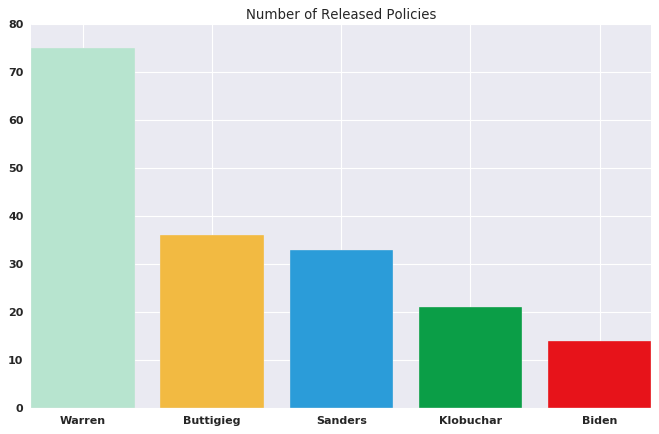

In [259]:

plt.figure(figsize = (10,6))
plt.title('Number of Released Policies')
plt.bar(x,y,color = colors);

In [222]:
colors = ['#b7e4cf', '#f2ba42','#2b9cd9','#0B9E47','#E7131A']

# Collect plans

## Warren

In [210]:
## Connect to warren page and return the links for all 
## of her plans

def new_tab(driver, link):
    ActionChains(driver) \
    .key_down(Keys.COMMAND) \
    .click(link) \
    .key_up(Keys.COMMAND) \
    .perform()

def connect_Warren(driver):
    
    driver.get('https://elizabethwarren.com/plans')
    try:
        donate = driver.find_element_by_xpath('//*[@id="donate-bar-ew"]/div/button')
        donate.click()
    except:
        pass
    table = driver.find_element_by_class_name('SearchResultsSectionBlocks__SearchResultsContainer-d1ttbu-1')
    links = driver.find_elements_by_class_name('SearchResultsSectionBlocks__ResultBlock-d1ttbu-2 ')
    
    return links

def Warren(driver):
    
    links = connect_Warren(driver)
        
    main_window = driver.current_window_handle
    data = {}
    
    for link in links:
        name = link.text
        
        new_tab(driver, link)

        sleep(1)
        try:
            driver.switch_to.window(driver.window_handles[1])
            policy_text = driver.find_element_by_tag_name('article').text
        except:
            policy_text = None
            
        data[name] = policy_text
        
        driver.close()

        sleep(1)

        driver.switch_to.window(main_window)
        
    return data     

In [211]:
data = Warren(driver)

In [445]:
import pandas as pd

In [452]:
warren = pd.DataFrame(data, index = ['Text']).T

In [455]:
warren.reset_index(inplace = True)

In [457]:
warren.columns = ['name', 'text']

In [459]:
warren['candidate'] = ['warren' for x in range(len(warren))]

In [460]:
warren.head()

,name,text,candidate
0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",warren
1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,warren
2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",warren
3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,warren
4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,warren


## Sanders

In [197]:
def connect_Sanders(driver):
    driver.get('https://berniesanders.com/issues/')
    table = driver.find_element_by_class_name('mb-5')
    links = table.find_elements_by_class_name('mb-3')
    
    return links

def Sanders(driver):    
    
    links = connect_Sanders(driver)
    
    main_window = driver.current_window_handle


    data = {}

    for link in links:

        name = link.text

        link.click()

        sleep(1)
        button = driver.find_element_by_partial_link_text('Read More')

        new_tab(driver, button)

        sleep(2)

        key_check = False
        body_check = False

        driver.switch_to.window(driver.window_handles[1])
        parts = driver.find_elements_by_class_name('my-3')
        for part in parts:
            if part.text[:3] == 'Key':
                key_check = True
                key = part.text
            elif part.text[:7] == 'Details':
                body_check = True
                body = part.text

        if (key_check==True) & (body_check==True):

            policy_text = key + ' ' + body

        elif body_check == True:

            policy_text = body

        data[name] = policy_text

        driver.close()
        driver.switch_to.window(main_window)


        link.find_element_by_class_name('btn').click()

        sleep(1)
        
        return data

In [188]:
count, data = Sanders(driver)
sanders = pd.DataFrame(data, index = ['policy']).T.reset_index()

In [190]:
sanders.columns = ['name', 'policy']

In [191]:
sanders

,name,policy
0,A Welcoming and Safe America for All,Key Points Details\nThis country is a nation o...
1,Medicare for All,"Key Points Details\nToday, more than 30 millio..."
2,Green New Deal,Key Points Details\nClimate change is a global...
3,College For All,"Key Points Details\nJust 30 years ago, tuition..."
4,Workplace Democracy,Key Points Details\nIt was the trade union mov...
5,Expand Social Security,"Key Points Details\nYes, we can live in a coun..."
6,Housing for All,"Key Points Details\nFor more than 40 years, we..."
7,Honoring Our Commitment to Veterans,Key Points Details\nGuarantee Veterans Benefit...
8,Free Child Care and Pre-K for All,Details\nOur current child care and early educ...
9,Justice and Safety for All,Key Points Details\nFor most of our history as...


In [253]:
driver.find_element_by_xpath('//*[@id="susi-modal-sign-up-link"]/div/h4/button/b').click()

In [254]:
driver.find_element_by_xpath('//*[@id="susi-modal-email-button"]/div/button/div').click()

In [256]:
email = driver.find_element_by_tag_name('input')


In [ ]:
email.send_keys('EMAIL')
driver.find_element_by_xpath('//*[@id="susi-modal-background"]/div/div/div[3]/div/div[3]/button').click()



## Klobuchar

In [248]:


driver.get('https://medium.com/@AmyforAmerica')

main_window = driver.current_window_handle

links = driver.find_elements_by_class_name('gm')

data = {}

for link in links:
    
    main_window = driver.current_window_handle
    
    name = link.text
    
    new_tab(driver, link)
    
    driver.switch_to.window(driver.window_handles[1])
    
    if link == link[0]:
        driver.find_element_by_class_name('button').click()
        
    
    text = driver.find_element_by_tag_name('article').text
    
    data[name] = text
    
    driver.close()
    
    driver.switch_to.window(main_window)
    
    
    
data

StaleElementReferenceException: Message: stale element reference: element is not attached to the page document
  (Session info: chrome=80.0.3987.122)


In [246]:
link.click()

In [226]:
driver.find_elements_by_class_name('fz')[0].click()

In [228]:
driver.find_element_by_tag_name('article').text

'Senator Klobuchar’s Plan to Protect Equal Rights and Provide Opportunity for People with Disabilities\nAmy for America\nFollow\nJan 9 · 14 min read\nAs Minnesota’s Happy Warrior and former-Vice President, Hubert Humphrey, once said: The moral test of a government is not just how it treats the young, healthy and able-bodied. It is also how it treats the sick, the elderly, and people with disabilities. As President, Senator Klobuchar will do more to support the disability community and ensure equal opportunity and equal rights.\nSenator Klobuchar has a strong track record of standing up for people with disabilities. For years, she served on the advisory board of the PACER Center, a Minnesota nonprofit that is dedicated to helping children and young adults with disabilities. In the Senate, she has worked to ensure people with disabilities have access to the same resources and opportunities as everyone else. Senator Klobuchar helped pass the landmark Achieving a Better Life Experience (AB

In [229]:
driver.get('https://medium.com/@AmyforAmerica')

In [230]:
links = driver.find_elements_by_class_name('fz')

In [241]:
driver.find_elements_by_class_name('gm')[0].click()